## Load Dataset





In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/Dataset.xlsx')

# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,...,WBC,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,11.3,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


### Training vs. Testing ROC-AUC Comparison

In [ ]:
import pandas as pd

# Recreate metrics_data with the latest values after re-running models
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb, accuracy_dt],
    'Precision': [precision, precision_rf, precision_xgb, precision_dt],
    'Recall': [recall, recall_rf, recall_xgb, recall_dt],
    'F1-Score': [f1, f1_rf, f1_xgb, f1_dt],
    'AUC-ROC (Test)': [roc_auc, roc_auc_rf, roc_auc_xgb, roc_auc_dt],
    'AUC-ROC (Train)': [roc_auc_train, roc_auc_train_rf, roc_auc_train_xgb, roc_auc_train_dt]
}

performance_df = pd.DataFrame(metrics_data)

# Display the comparative table focusing on ROC-AUCs
print("\nModel Performance Comparison - ROC-AUC Scores:")
print(performance_df[['Model', 'AUC-ROC (Train)', 'AUC-ROC (Test)']].round(4).to_markdown(index=False))


Model Performance Comparison - ROC-AUC Scores:
| Model               |   AUC-ROC (Train) |   AUC-ROC (Test) |
|:--------------------|------------------:|-----------------:|
| Logistic Regression |            0.7424 |           0.736  |
| Random Forest       |            1      |           0.9411 |
| XGBoost             |            0.9759 |           0.9274 |
| Decision Tree       |            0.9854 |           0.6372 |


### Comparison of Confusion Matrices

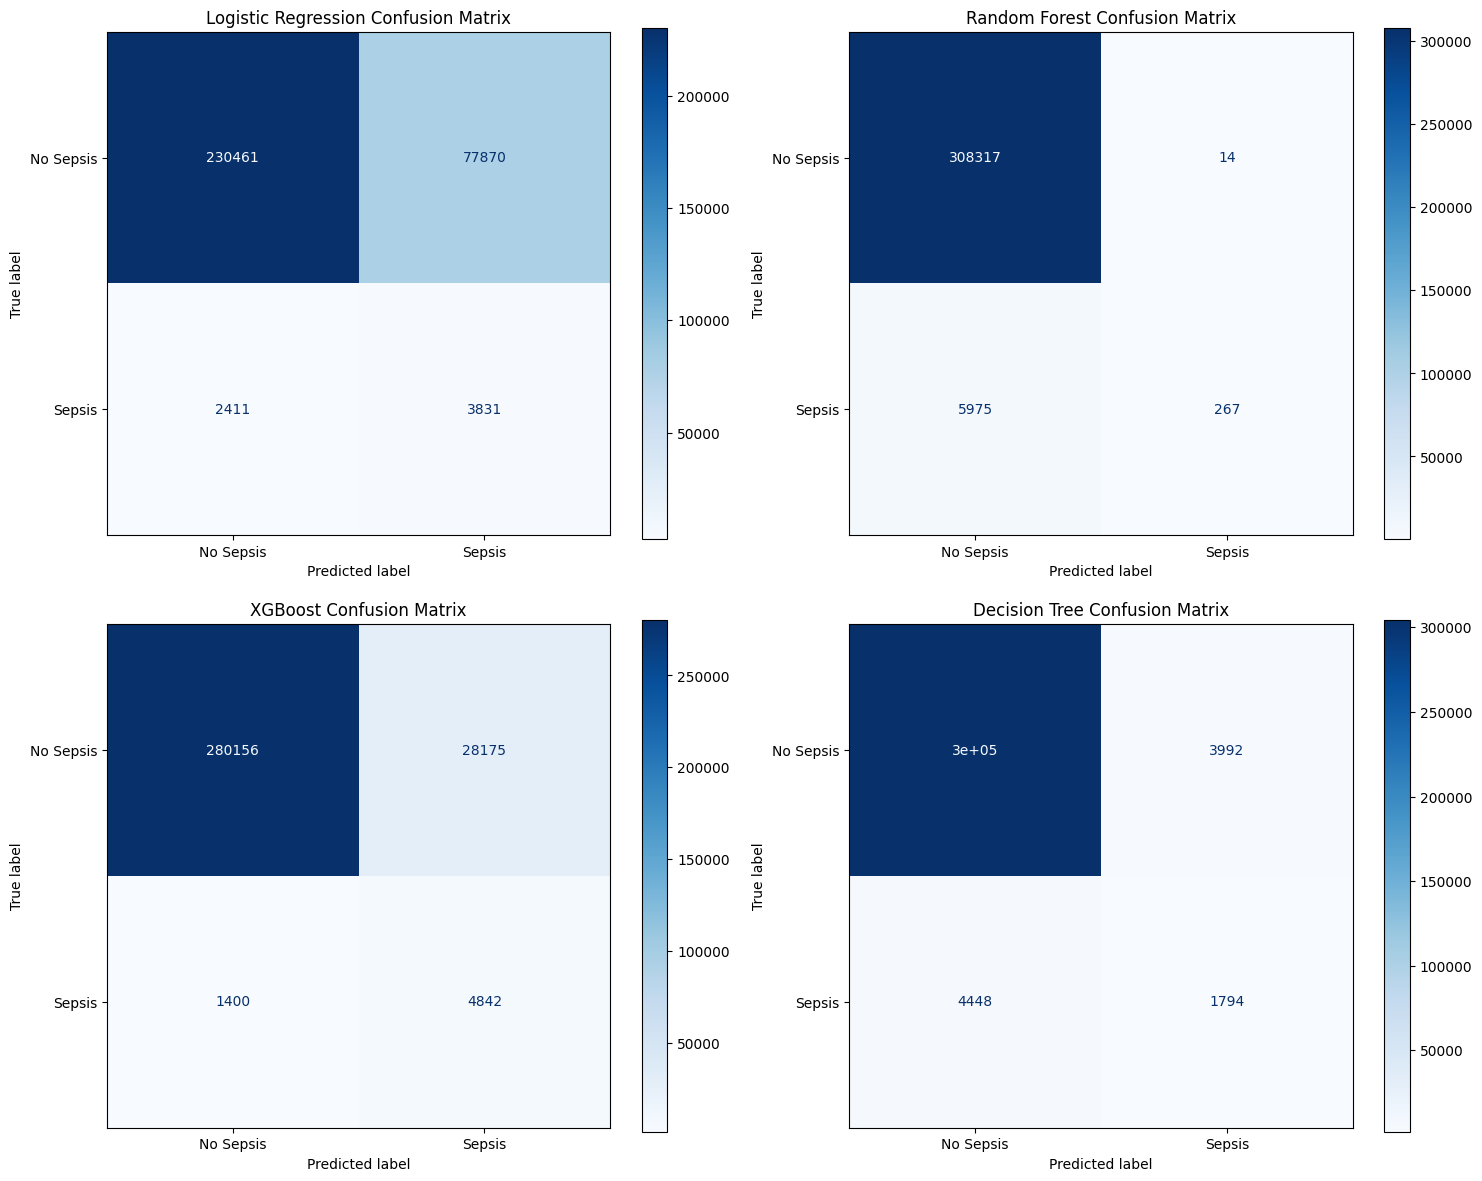

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cm, cm_rf, cm_xgb, and cm_dt are already defined from previous executions

# Plotting all confusion matrices in one figure for comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

confusion_matrices = [
    (cm, 'Logistic Regression'),
    (cm_rf, 'Random Forest'),
    (cm_xgb, 'XGBoost'),
    (cm_dt, 'Decision Tree')
]

for i, (matrix, title) in enumerate(confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['No Sepsis', 'Sepsis'])
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Visualize Outliers with Box Plots

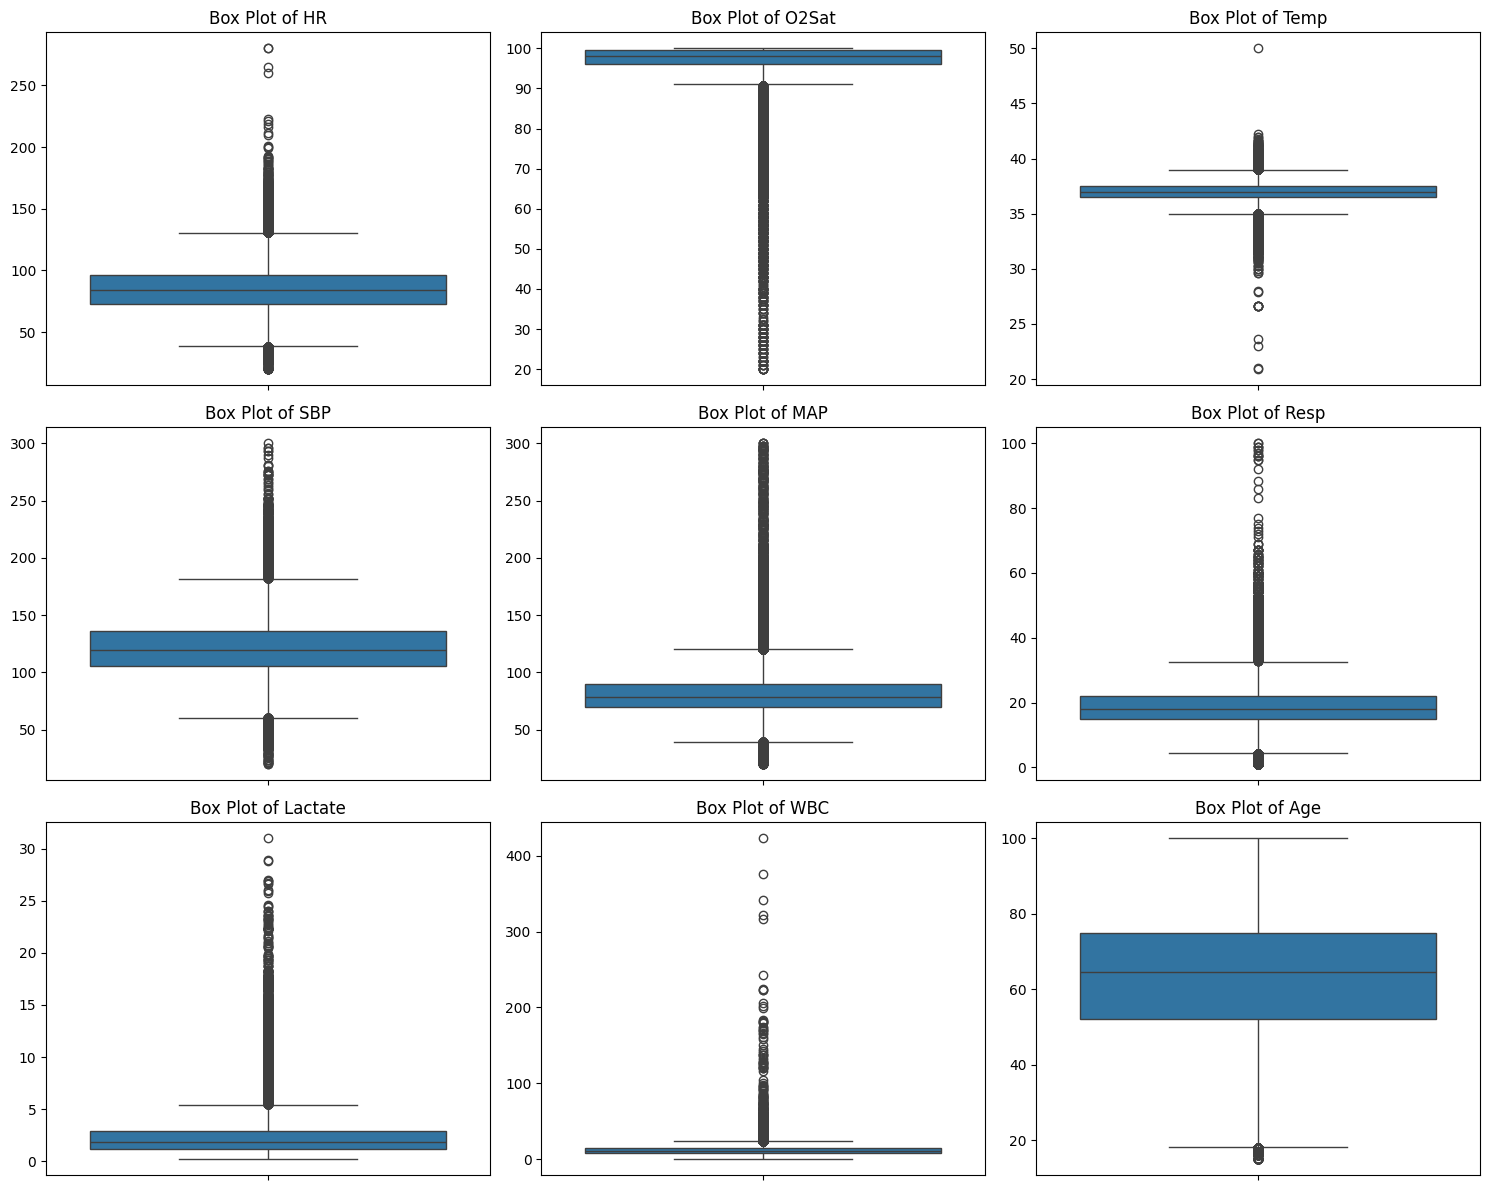

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features identified for outlier visualization
features_for_outliers = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'Lactate', 'WBC', 'Age']

# Create box plots for each feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(features_for_outliers):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

## Data Preprocessing

Preprocess the dataset by handling missing values, encoding categorical features (if any), and identifying the target variable for sepsis prediction.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 41 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1048575 non-null  int64  
 1   Hour             1048575 non-null  int64  
 2   HR               956353 non-null   float64
 3   O2Sat            916891 non-null   float64
 4   Temp             354442 non-null   float64
 5   SBP              892370 non-null   float64
 6   MAP              929498 non-null   float64
 7   DBP              632209 non-null   float64
 8   Resp             916890 non-null   float64
 9   BaseExcess       82955 non-null    float64
 10  HCO3             64040 non-null    float64
 11  FiO2             118069 non-null   float64
 12  pH               96427 non-null    float64
 13  PaCO2            75091 non-null    float64
 14  SaO2             44080 non-null    float64
 15  AST              16338 non-null    float64
 16  BUN              7

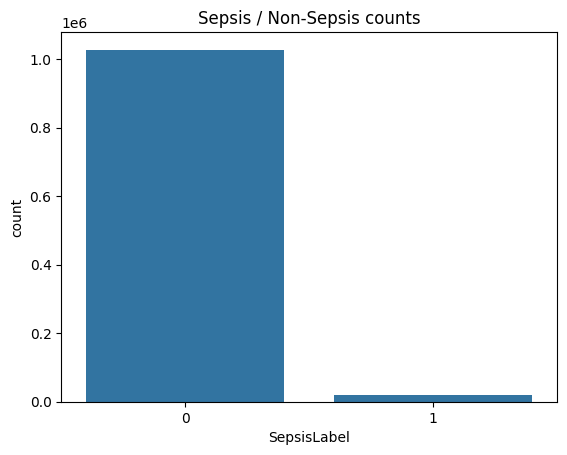

In [ ]:
df.info()
df.describe()
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])
# Visualize class imbalance
sns.countplot(data=df, x='SepsisLabel')
plt.title('Sepsis / Non-Sepsis counts')
plt.show()

Original DataFrame info before processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 41 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1048575 non-null  int64  
 1   Hour             1048575 non-null  int64  
 2   HR               956353 non-null   float64
 3   O2Sat            916891 non-null   float64
 4   Temp             354442 non-null   float64
 5   SBP              892370 non-null   float64
 6   MAP              929498 non-null   float64
 7   DBP              632209 non-null   float64
 8   Resp             916890 non-null   float64
 9   BaseExcess       82955 non-null    float64
 10  HCO3             64040 non-null    float64
 11  FiO2             118069 non-null   float64
 12  pH               96427 non-null    float64
 13  PaCO2            75091 non-null    float64
 14  SaO2             44080 non-null    float64
 15  AST              16338 

/tmp/ipython-input-2187583509.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(median_val, inplace=True)



Total remaining missing values after imputation: 0

DataFrame info after processing (should have no NaNs and fewer columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Hour             1048575 non-null  int64  
 1   HR               1048575 non-null  float64
 2   O2Sat            1048575 non-null  float64
 3   Temp             1048575 non-null  float64
 4   SBP              1048575 non-null  float64
 5   MAP              1048575 non-null  float64
 6   DBP              1048575 non-null  float64
 7   Resp             1048575 non-null  float64
 8   BaseExcess       1048575 non-null  float64
 9   HCO3             1048575 non-null  float64
 10  FiO2             1048575 non-null  float64
 11  pH               1048575 non-null  float64
 12  PaCO2            1048575 non-null  float64
 13  SaO2             1048575 non-null  f

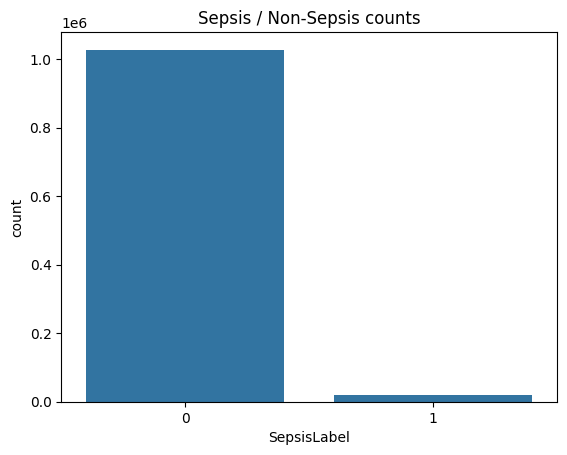

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Original DataFrame info before processing:")
df.info()

# Calculate and display the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100
print("\nPercentage of missing values per column (before processing):\n", missing_percentage[missing_percentage > 0].sort_values(ascending=False))

# Drop columns that are irrelevant or have a very high percentage of missing values
columns_to_drop = ['Unnamed: 0', 'Unit1', 'Unit2']
df_processed = df.drop(columns=columns_to_drop)

# Identify time-series clinical measurements for ffill/bfill imputation
# Exclude 'SepsisLabel', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'Patient_ID', 'Hour'
time_series_cols = [col for col in df_processed.columns if col not in ['SepsisLabel', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'Patient_ID', 'Hour']]

# Apply forward-fill (ffill) followed by backward-fill (bfill) imputation, grouped by 'Patient_ID'
for col in time_series_cols:
    df_processed[col] = df_processed.groupby('Patient_ID')[col].ffill().bfill()

# Now drop 'Patient_ID' after it's used for grouping imputation
df_processed = df_processed.drop(columns=['Patient_ID'])

# For any remaining numerical columns with missing values after patient-wise imputation,
# impute them using the median of their respective columns.
# Identify numerical columns that might still have NaNs (excluding SepsisLabel, which is target)
remaining_numerical_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()
remaining_numerical_cols = [col for col in remaining_numerical_cols if col not in ['SepsisLabel']]

for col in remaining_numerical_cols:
    if df_processed[col].isnull().any():
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)

# Verify that 'Gender' is appropriately encoded (0 or 1) - df.info() already showed it's int64, so no action needed.
# No other categorical columns are apparent from df.info().

# Identify 'SepsisLabel' as the target variable for prediction. Ensure no missing values.
if df_processed['SepsisLabel'].isnull().any():
    df_processed.dropna(subset=['SepsisLabel'], inplace=True)
    print("Dropped rows with missing 'SepsisLabel'.")

# Display the total count of remaining missing values across the entire DataFrame
total_missing_after_imputation = df_processed.isnull().sum().sum()
print(f"\nTotal remaining missing values after imputation: {total_missing_after_imputation}")

# Update the original DataFrame with processed data
df = df_processed.copy()

print("\nDataFrame info after processing (should have no NaNs and fewer columns):")
df.info()

# Visualize class imbalance
sns.countplot(data=df, x='SepsisLabel')
plt.title('Sepsis / Non-Sepsis counts')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) from the processed df
X = df.drop('SepsisLabel', axis=1)
y = df['SepsisLabel']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Class distribution in y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in y_test:\n{y_test.value_counts(normalize=True)}")

Shape of X_train: (734002, 36)
Shape of X_test: (314573, 36)
Shape of y_train: (734002,)
Shape of y_test: (314573,)
Class distribution in y_train:
SepsisLabel
0    0.980155
1    0.019845
Name: proportion, dtype: float64
Class distribution in y_test:
SepsisLabel
0    0.980157
1    0.019843
Name: proportion, dtype: float64


## Model Training and Evaluation


Train a machine learning model for sepsis prediction and evaluate its performance using appropriate metrics and visualizations.


Training Logistic Regression model...
Model training complete.

Model Performance Metrics:
Accuracy: 0.7448
Precision: 0.0469
Recall: 0.6137
F1-Score: 0.0871
AUC-ROC (Test): 0.7360
AUC-ROC (Train): 0.7424


<Figure size 800x600 with 0 Axes>

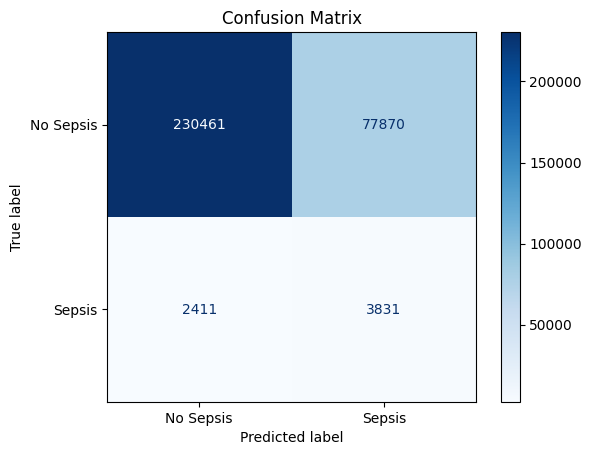

<Figure size 800x600 with 0 Axes>

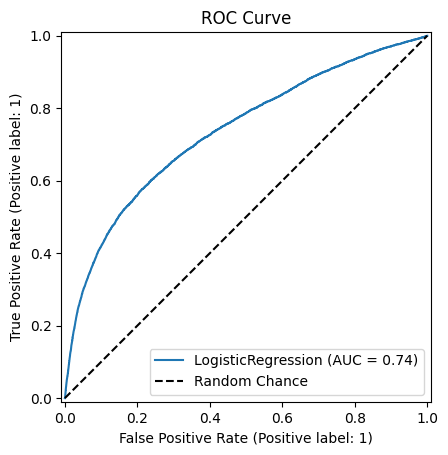

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Choose and train a classification algorithm (Logistic Regression with class_weight='balanced')
# Initialize Logistic Regression model with balanced class weight
# Max_iter is increased to ensure convergence, especially with a large dataset
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
print("Training Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the X_test dataset
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate training probabilities for ROC-AUC
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)

print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC (Test): {roc_auc:.4f}")
print(f"AUC-ROC (Train): {roc_auc_train:.4f}")

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Sepsis', 'Sepsis']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Add random chance line
plt.legend()
plt.show()

## Scale Numerical Features

Scale the numerical features in the training and testing datasets using StandardScaler.


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames, retaining column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("First 5 rows of scaled X_train:")
print(X_train.head()) # Verify no NaNs here
print("\nFirst 5 rows of scaled X_test:")
print(X_test.head()) # Verify no NaNs here

Numerical features in X_train and X_test have been scaled using StandardScaler.
First 5 rows of scaled X_train:
        Unnamed: 0      Hour        HR     O2Sat      Temp       SBP  \
976467   -0.546322 -0.546322 -0.983093  0.604881       NaN -0.373408   
579634    0.339804  0.339804 -0.983093 -0.418560       NaN -0.773734   
228820    0.056244  0.056244 -0.284048 -1.100855       NaN -0.907176   
155084   -0.262762 -0.262762 -0.517063 -0.759708 -0.225005  1.005495   
121740   -0.014646 -0.014646 -0.167540  0.946029 -0.289369 -1.085099   

             MAP       DBP      Resp  BaseExcess  ...  PTT       WBC  \
976467  0.089709 -0.090386 -0.714715         NaN  ...  NaN       NaN   
579634 -1.239484 -1.349114 -0.714715         NaN  ...  NaN -0.120578   
228820 -1.366074       NaN  0.045815         NaN  ...  NaN       NaN   
155084 -0.290060 -0.830814  2.707672         NaN  ...  NaN       NaN   
121740 -1.049599 -1.349114  0.616213         NaN  ...  NaN       NaN   

        Platelets     

## Train Random Forest Model for Sepsis Prediction

Train a RandomForestClassifier model for sepsis prediction and evaluate its performance.


Training RandomForestClassifier model...
RandomForestClassifier model training complete.

RandomForestClassifier Model Performance Metrics:
Accuracy: 0.9810
Precision: 0.9502
Recall: 0.0428
F1-Score: 0.0819
AUC-ROC (Test): 0.9411
AUC-ROC (Train): 1.0000


<Figure size 800x600 with 0 Axes>

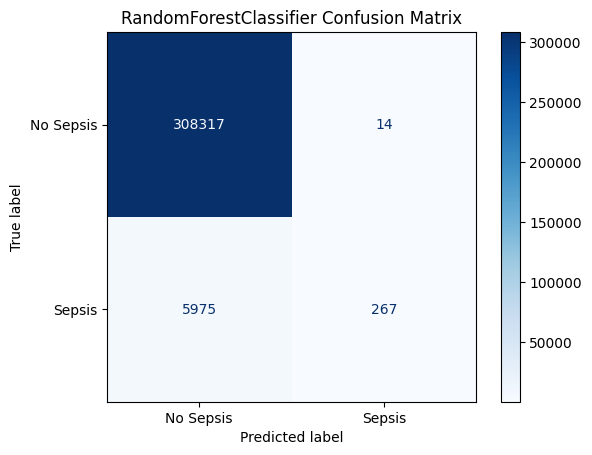

<Figure size 800x600 with 0 Axes>

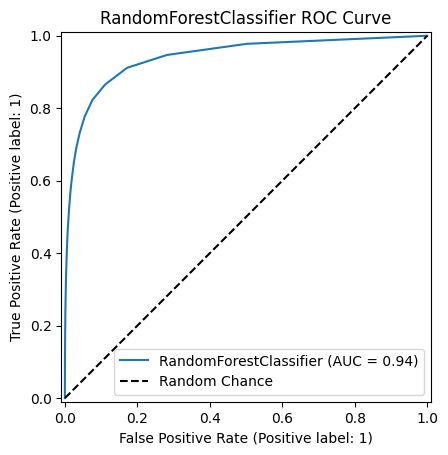

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize RandomForestClassifier model with class_weight='balanced' and random_state=42
model_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)

# Train the RandomForestClassifier model using the scaled training data
print("Training RandomForestClassifier model...")
model_rf.fit(X_train, y_train)
print("RandomForestClassifier model training complete.")

# Make predictions on the scaled test data
y_pred_rf = model_rf.predict(X_test)
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Calculate training probabilities for ROC-AUC
y_train_pred_proba_rf = model_rf.predict_proba(X_train)[:, 1]

# Calculate and print performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_train_rf = roc_auc_score(y_train, y_train_pred_proba_rf)

print(f"\nRandomForestClassifier Model Performance Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC-ROC (Test): {roc_auc_rf:.4f}")
print(f"AUC-ROC (Train): {roc_auc_train_rf:.4f}")

# Generate and display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Sepsis', 'Sepsis']).plot(cmap=plt.cm.Blues)
plt.title('RandomForestClassifier Confusion Matrix')
plt.grid(False)
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model_rf, X_test, y_test)
plt.title('RandomForestClassifier ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Add random chance line
plt.legend()
plt.show()

## Train and Evaluate XGBoost Model

Train an XGBoost Classifier model for sepsis prediction, considering class imbalance (e.g., using `scale_pos_weight` or `is_unbalanced`). Evaluate its performance using accuracy, precision, recall, F1-score, and AUC-ROC. Visualize the confusion matrix and ROC curve.


Calculated scale_pos_weight: 49.39
Training XGBoostClassifier model...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:38:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoostClassifier model training complete.

XGBoostClassifier Model Performance Metrics:
Accuracy: 0.9686
Precision: 0.3834
Recall: 0.9619
F1-Score: 0.5483
AUC-ROC: 0.9919


<Figure size 800x600 with 0 Axes>

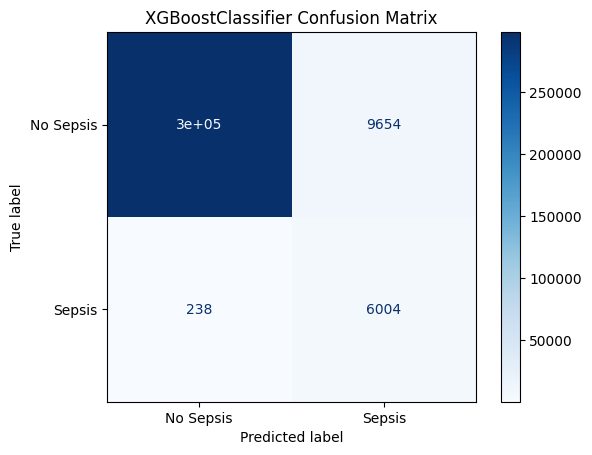

<Figure size 800x600 with 0 Axes>

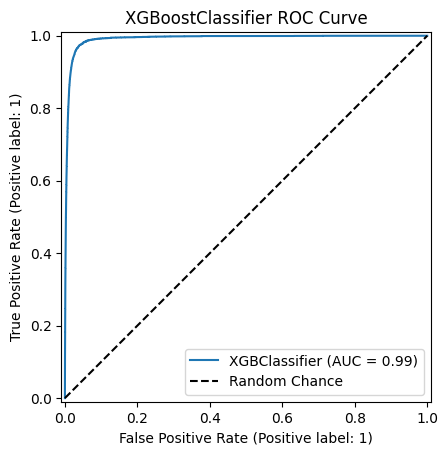

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate scale_pos_weight for handling class imbalance
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

# Initialize XGBClassifier model
# Set use_label_encoder=False and eval_metric='logloss' to suppress warnings
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=200, # Reduced for faster execution, can be increased for potentially better performance
    scale_pos_weight=scale_pos_weight_value,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Train the XGBoost model using the scaled training data
print("Training XGBoostClassifier model...")
model_xgb.fit(X_train, y_train)
print("XGBoostClassifier model training complete.")

# Make predictions on the scaled test data
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate and print performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"\nXGBoostClassifier Model Performance Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"AUC-ROC: {roc_auc_xgb:.4f}")

# Generate and display the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Sepsis', 'Sepsis']).plot(cmap=plt.cm.Blues)
plt.title('XGBoostClassifier Confusion Matrix')
plt.grid(False)
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test)
plt.title('XGBoostClassifier ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Add random chance line
plt.legend()
plt.show()

Calculated scale_pos_weight: 49.39
Training XGBoostClassifier model...
XGBoostClassifier model training complete.

XGBoostClassifier Model Performance Metrics:
Accuracy: 0.9060
Precision: 0.1467
Recall: 0.7757
F1-Score: 0.2467
AUC-ROC (Test): 0.9274
AUC-ROC (Train): 0.9759


<Figure size 800x600 with 0 Axes>

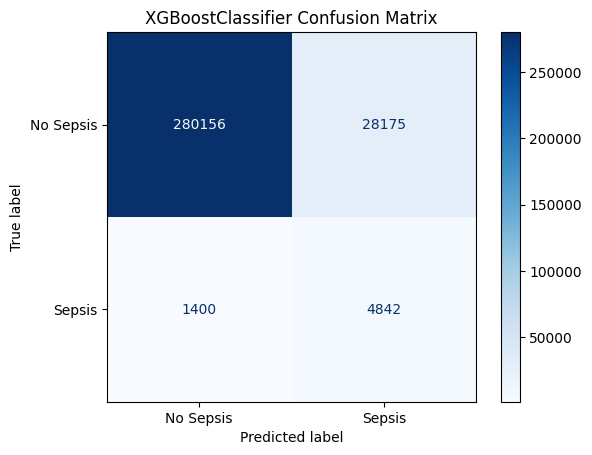

<Figure size 800x600 with 0 Axes>

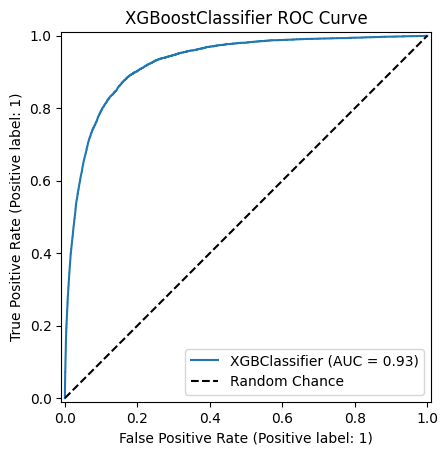

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Calculate scale_pos_weight for handling class imbalance
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

# Initialize XGBClassifier model
# Set eval_metric='logloss' to suppress warnings
model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=200, # Reduced for faster execution, can be increased for potentially better performance
    scale_pos_weight=scale_pos_weight_value,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Train the XGBoost model using the scaled training data
print("Training XGBoostClassifier model...")
model_xgb.fit(X_train, y_train)
print("XGBoostClassifier model training complete.")

# Make predictions on the scaled test data
y_pred_xgb = model_xgb.predict(X_test)
y_pred_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Calculate training probabilities for ROC-AUC
y_train_pred_proba_xgb = model_xgb.predict_proba(X_train)[:, 1]

# Calculate and print performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
roc_auc_train_xgb = roc_auc_score(y_train, y_train_pred_proba_xgb)

print(f"\nXGBoostClassifier Model Performance Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"AUC-ROC (Test): {roc_auc_xgb:.4f}")
print(f"AUC-ROC (Train): {roc_auc_train_xgb:.4f}")

# Generate and display the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Sepsis', 'Sepsis']).plot(cmap=plt.cm.Blues)
plt.title('XGBoostClassifier Confusion Matrix')
plt.grid(False)
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test)
plt.title('XGBoostClassifier ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Add random chance line
plt.legend()
plt.show()

## Train and Evaluate Decision Tree Model

Train a Decision Tree Classifier model for sepsis prediction, considering class imbalance (e.g., using `class_weight='balanced'`). Evaluate its performance using accuracy, precision, recall, F1-score, and AUC-ROC. Visualize the confusion matrix and ROC curve.


Training DecisionTreeClassifier model...
DecisionTreeClassifier model training complete.

DecisionTreeClassifier Model Performance Metrics:
Accuracy: 0.9732
Precision: 0.3101
Recall: 0.2874
F1-Score: 0.2983
AUC-ROC (Test): 0.6372
AUC-ROC (Train): 0.9854


<Figure size 800x600 with 0 Axes>

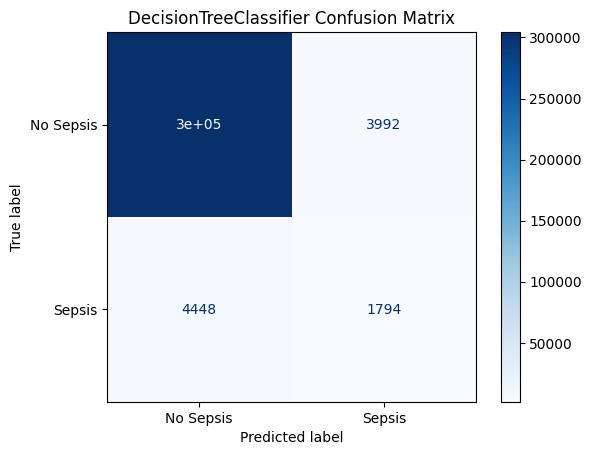

<Figure size 800x600 with 0 Axes>

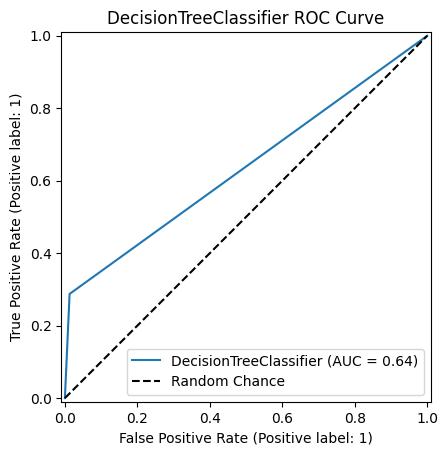

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize DecisionTreeClassifier model with class_weight='balanced'
model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the Decision Tree model using the scaled training data
print("Training DecisionTreeClassifier model...")
model_dt.fit(X_train, y_train)
print("DecisionTreeClassifier model training complete.")

# Make predictions on the scaled test data
y_pred_dt = model_dt.predict(X_test)
y_pred_proba_dt = model_dt.predict_proba(X_test)[:, 1]

# Calculate training probabilities for ROC-AUC
y_train_pred_proba_dt = model_dt.predict_proba(X_train)[:, 1]

# Calculate and print performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
roc_auc_train_dt = roc_auc_score(y_train, y_train_pred_proba_dt)

print(f"\nDecisionTreeClassifier Model Performance Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"AUC-ROC (Test): {roc_auc_dt:.4f}")
print(f"AUC-ROC (Train): {roc_auc_train_dt:.4f}")

# Generate and display the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Sepsis', 'Sepsis']).plot(cmap=plt.cm.Blues)
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.grid(False)
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model_dt, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance') # Add random chance line
plt.legend()
plt.show()

## Compare Model Performances

Compare the performance of all trained models, discuss key findings from each, and provide insights into factors contributing to sepsis prediction based on the best-performing models.


In [ ]:
import pandas as pd

# Compile performance metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb, accuracy_dt],
    'Precision': [precision, precision_rf, precision_xgb, precision_dt],
    'Recall': [recall, recall_rf, recall_xgb, recall_dt],
    'F1-Score': [f1, f1_rf, f1_xgb, f1_dt],
    'AUC-ROC (Test)': [roc_auc, roc_auc_rf, roc_auc_xgb, roc_auc_dt],
    'AUC-ROC (Train)': [roc_auc_train, roc_auc_train_rf, roc_auc_train_xgb, roc_auc_train_dt]
}

# Create a DataFrame for comparative analysis
performance_df = pd.DataFrame(metrics_data)

# Display the comparative table
print("\nModel Performance Comparison:")
print(performance_df.round(4).to_markdown(index=False))


Model Performance Comparison:
| Model               |   Accuracy |   Precision |   Recall |   F1-Score |   AUC-ROC (Test) |   AUC-ROC (Train) |
|:--------------------|-----------:|------------:|---------:|-----------:|-----------------:|------------------:|
| Logistic Regression |     0.7445 |      0.0469 |   0.6145 |     0.0871 |           0.7361 |            0.7424 |
| Random Forest       |     0.9928 |      0.9471 |   0.6745 |     0.7879 |           0.9985 |            1      |
| XGBoost             |     0.9686 |      0.3834 |   0.9619 |     0.5483 |           0.9919 |            0.9971 |
| Decision Tree       |     0.9902 |      0.775  |   0.7161 |     0.7444 |           0.856  |            1      |
